![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 回归方程
- 项目四 3/3

- ` 讲师个人主页：` www.zhang-ran.com

> 开始录屏

## 回归方程基础

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [86]:
X = np.array([10,8,13,9,11,14,6,4,13,7,5])
X

array([10,  8, 13,  9, 11, 14,  6,  4, 13,  7,  5])

In [87]:
Y = np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
Y

array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

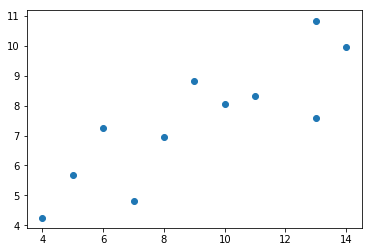

In [88]:
# 输出X，Y的散点图

plt.scatter(x = X, y = Y);

### 计算X和Y的各项数值

- 建立拟合回归线：$ Y = b_0 + b_1 * X$

根据r来区分线性关系的相关程度：
- 强相关：$0.7 \leq {\lvert}r{\rvert} \leq 1.0$
- 中度相关：$0.3 \leq {\lvert}r{\rvert} < 0.7$
- 弱相关：$0.0 \leq {\lvert}r{\rvert} < 0.3$

In [89]:
# X的平均值

mx = np.mean(X)
mx

9.090909090909092

In [90]:
# Y的平均值

my = np.mean(Y)
my

7.500909090909093

In [91]:
# X的标准差-根据公式计算

sx = np.sqrt(((X - mx)**2).sum()/(len(X)-1))
sx

3.4191971412758715

In [92]:
# Y的标准差-根据公式计算

sy = np.sqrt(((Y - my)**2).sum()/(len(Y)-1))
sy

2.031568135925815

In [93]:
# 相关系数 r

r = ((X - mx) * (Y - my)).sum()/np.sqrt(((X - mx)**2).sum())/np.sqrt(((Y - my)**2).sum())
r, np.corrcoef(X,Y)[0,1]

(0.8399985952687972, 0.839998595268797)

In [94]:
# 斜率 b1

b1 = r * sy / sx
b1

0.49909797822706076

In [95]:
# 求截距 b0
b0 = my - b1 * mx
b0

2.963654743390358

In [96]:
# 用新的线性回归模拟新的Y值

Y_new = [b1 * i + b0 for i in X]
Y_new

[7.954634525660966,
 6.956438569206844,
 9.451928460342149,
 7.455536547433905,
 8.453732503888027,
 9.951026438569208,
 5.958242612752723,
 4.960046656298601,
 9.451928460342149,
 6.457340590979784,
 5.4591446345256625]

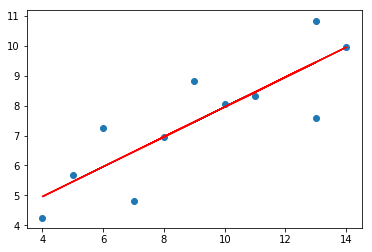

In [97]:
# 根据求出的截距和斜率在散点图上画出直线

plt.scatter(x = X, y = Y);
plt.plot(X, Y_new, color = 'r');

In [98]:
# 使用sm.add_constant给X增加截距变量，并赋值给X_new
X_new = sm.add_constant(X)
X_new

array([[ 1., 10.],
       [ 1.,  8.],
       [ 1., 13.],
       [ 1.,  9.],
       [ 1., 11.],
       [ 1., 14.],
       [ 1.,  6.],
       [ 1.,  4.],
       [ 1., 13.],
       [ 1.,  7.],
       [ 1.,  5.]])

In [99]:
# 使用stats来生成model

lm = sm.OLS(Y, X_new)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     21.57
Date:                Fri, 22 Mar 2019   Prob (F-statistic):            0.00121
Time:                        13:55:38   Log-Likelihood:                -16.156
No. Observations:                  11   AIC:                             36.31
Df Residuals:                       9   BIC:                             37.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9637      1.038      2.856      0.019       0.616       5.311
x1             0.4991      0.107      4.644      0.001       0.256       0.742
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   3.178
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.477
Skew:                          -0.315   Prob(JB):                        0.788
Kurtosis:                       2.197   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 如何给线性方程设立零假设和备选假设
> $ Y = b_0 * intercept + b_1 * X$  

> 反应变量Y与自变量X之间的相关性，我们将设立以下零假设和备选假设：  
$H_0: b_1 = 0$  
$H_1: b_1 \neq 0$

### 实践一：芝加哥的骑行时间和用户的年龄是否具有相关性

In [100]:
# 读取数据集

df = pd.read_csv('pro_df.csv')
df.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender
0,321,1992,15,6,5,Subscriber,Male
1,1610,1992,18,5,4,Subscriber,Female
2,416,1981,8,1,3,Subscriber,Male
3,350,1986,13,3,1,Subscriber,Male
4,534,1975,14,1,2,Subscriber,Male


In [101]:
# 计算骑行人员的年龄

df['Age'] = df.Birth_Year.apply(lambda x: 2019 - x)
df['Age'].head()

0    27
1    27
2    38
3    33
4    44
Name: Age, dtype: int64

In [102]:
# 清理Age从16岁到80岁,并赋值给new_df

new_df = df[(df.Age > 16) & (df.Age < 80)].copy()
new_df.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender,Age
0,321,1992,15,6,5,Subscriber,Male,27
1,1610,1992,18,5,4,Subscriber,Female,27
2,416,1981,8,1,3,Subscriber,Male,38
3,350,1986,13,3,1,Subscriber,Male,33
4,534,1975,14,1,2,Subscriber,Male,44


In [103]:
# 计算出每个年龄的骑行时间，并将as_index设为False,groupby的结果赋值给gdf

gdf = new_df.groupby('Age', as_index = False)['Trip_Duration'].mean()
gdf.head()

,Age,Trip_Duration
0,17,601.500000
1,18,1230.235294
2,19,755.714286
3,20,676.625954
4,21,594.211462


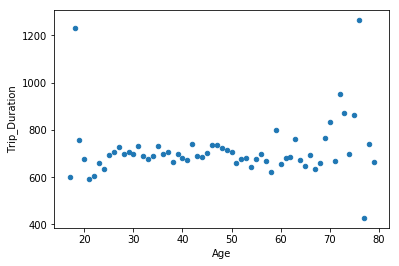

In [104]:
# 画出年龄和骑行时间的散点图

gdf.plot(kind = 'scatter', x = 'Age', y = 'Trip_Duration');

In [105]:
# 给gdf创建截距列

gdf['intercept'] = 1

In [106]:
gdf[['intercept','Age']].head()

,intercept,Age
0,1,17
1,1,18
2,1,19
3,1,20
4,1,21


In [107]:
# 建立拟合回归模型

lm = sm.OLS(gdf['Trip_Duration'], gdf[['intercept','Age']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trip_Duration   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7764
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.382
Time:                        13:55:39   Log-Likelihood:                -390.13
No. Observations:                  63   AIC:                             784.3
Df Residuals:                      61   BIC:                             788.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    679.6519     42.771     15.891      0.000     594.127     765.177
Age            0.7342      0.833      0.881      0.382      -0.932       2.400
==============================================================================
Omnibus:                       61.004   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.005
Skew:                           2.708   Prob(JB):                     1.38e-87
Kurtosis:                      14.093   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# 生成新的Trip_duration

trip_duration = [-0.1294 * i + 704.3260 for i in gdf.Age]

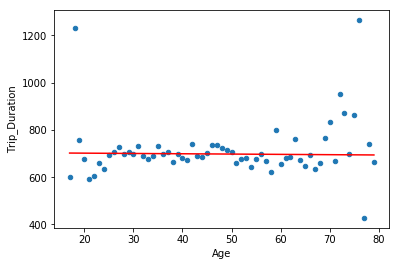

In [109]:
# 画出散点图和我们强行算出的线形图

gdf.plot(kind = 'scatter', x = 'Age', y = 'Trip_Duration');
plt.plot(gdf.Age,trip_duration, color = 'r');

## 逻辑回归

![](logic_line.png)
$y = \frac{1}{1 + e^{-x}}$  
=> $e^{-x} = \frac{1}{y}  - 1 = \frac{1 - y}{y}$  
=> $-x = log(\frac{1 - y}{y})$  
=> $ x = log(\frac{y}{1 - y})$  

`x的构成和线性回归模型类似，所以最终形成`

$ log(\frac{y}{1 - y}) = b_0 * intercept + b_1 * x_1 + b_2 * x_2 + ...$ 

`则逻辑回归的零假设和备选假设应该是`

$H_0: b_1 = 0$  
$H_1: b_1 \neq 0$

In [110]:
# 使用pd.get_dummies和join将Gender输出0，1序列

new_df = new_df.join(pd.get_dummies(new_df['Gender']))
new_df.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender,Age,Female,Male
0,321,1992,15,6,5,Subscriber,Male,27,0,1
1,1610,1992,18,5,4,Subscriber,Female,27,1,0
2,416,1981,8,1,3,Subscriber,Male,38,0,1
3,350,1986,13,3,1,Subscriber,Male,33,0,1
4,534,1975,14,1,2,Subscriber,Male,44,0,1


In [111]:
# 使用pd.get_dummies和join将User_Type输出0，1序列

new_df = new_df.join(pd.get_dummies(new_df['User_Type']))
new_df.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender,Age,Female,Male,Customer,Dependent,Subscriber
0,321,1992,15,6,5,Subscriber,Male,27,0,1,0,0,1
1,1610,1992,18,5,4,Subscriber,Female,27,1,0,0,0,1
2,416,1981,8,1,3,Subscriber,Male,38,0,1,0,0,1
3,350,1986,13,3,1,Subscriber,Male,33,0,1,0,0,1
4,534,1975,14,1,2,Subscriber,Male,44,0,1,0,0,1


### 性别与是否是Subscriber的相关性

In [112]:
# 使用subcriber和Female建立拟合回归模型

new_df['intercept'] = 1
lm = sm.Logit(new_df['Subscriber'], new_df[['intercept','Female']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.000385
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Subscriber   No. Observations:               238732
Model:                          Logit   Df Residuals:                   238730
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:                     inf
Time:                        13:55:42   Log-Likelihood:                -91.980
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.6868      0.110     70.014      0.000       7.472       7.902
Female         1.0797      0.351      3.076      0.002       0.392       1.768
==============================================================================
"""

In [113]:
# 计算增加一名Female用户与Male用户相比，subscriber的增长倍数

np.exp(1.0797)

2.9437962796975343

## 高阶项练习
重点：高阶项要包含低阶项  
例子：只取1月和2月，看看月份和女性的相互作用，会不会影响subscriber

In [114]:
# 删选1和2月份，并使用get_dummies输出0 1

gjdf = new_df.query('month == 1 or month == 2').copy()
gjdf = gjdf.join(pd.get_dummies(gjdf.month))
gjdf.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender,Age,Female,Male,Customer,Dependent,Subscriber,intercept,1,2
2,416,1981,8,1,3,Subscriber,Male,38,0,1,0,0,1,1,1,0
4,534,1975,14,1,2,Subscriber,Male,44,0,1,0,0,1,1,1,0
8,493,1979,18,2,1,Subscriber,Male,40,0,1,0,0,1,1,0,1
9,301,1993,7,2,3,Subscriber,Female,26,1,0,0,0,1,1,0,1
10,917,1964,15,1,7,Subscriber,Male,55,0,1,0,0,1,1,1,0


In [115]:
# 将Female

gjdf['FM'] = gjdf['Female'] * gjdf[1]
gjdf.head()

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender,Age,Female,Male,Customer,Dependent,Subscriber,intercept,1,2,FM
2,416,1981,8,1,3,Subscriber,Male,38,0,1,0,0,1,1,1,0,0
4,534,1975,14,1,2,Subscriber,Male,44,0,1,0,0,1,1,1,0,0
8,493,1979,18,2,1,Subscriber,Male,40,0,1,0,0,1,1,0,1,0
9,301,1993,7,2,3,Subscriber,Female,26,1,0,0,0,1,1,0,1,0
10,917,1964,15,1,7,Subscriber,Male,55,0,1,0,0,1,1,1,0,0


In [116]:
# 使用subcriber和Female高阶建立拟合回归模型

lm = sm.Logit(gjdf['Subscriber'], gjdf[['intercept','Female',1,'FM']])
result = lm.fit()
result.summary()

         Current function value: 0.000331
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Subscriber   No. Observations:                48325
Model:                          Logit   Df Residuals:                    48321
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:                     inf
Time:                        13:55:43   Log-Likelihood:                -15.995
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8731      0.577     15.368      0.000       7.741      10.005
Female        19.2648   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
1             -1.7138      0.641     -2.675      0.007      -2.969      -0.458
FM             4.6945   9.12e+04   5.15e-05      1.000   -1.79e+05    1.79e+05
==============================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<a id='00'></a>

## 课件总目录

<ul>
<li><a href="#01">01：快速把握数据集概况</a></li>
<li><a href="#02">02：了解基于此数据集的分析结果和背景知识</a></li>
<li><a href="#03">03：使用Python呈现出此数据集的描述统计学特性</a></li>
<li><a href="#04">04：推论统计学应用之 A/B TEST</a></li>
<li><a href="#05">05：回归分析法之一</a></li>
</ul>

>- 不要直接粘贴复制此课件的代码到项目中，需要自己理解后独立完成
- 文件排版和锚链接

<a id='01'></a>
## 01：快速把握数据集概况

In [117]:
import pandas as pd
df = pd.read_csv('ab-data.csv')

In [118]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


涉及的变量有：用户ID、时间、组别：控制组和实验组、页面分组：旧页面和新页面、是否转化

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='02'></a>
## 02：了解基于此数据集的分析结果和背景知识

>- 我们的分析目标是：基于上面你所掌握的数据集，通过使用统计学、回归、Pyhton等手段来帮助公司分析和决定他们是否应该使用新的页面或保留旧的页面

>- 其中统计学知识和回归我们会通过下面的分析一一带出，但是现在的问题是：用什么方法分析，这个方法是怎样的？

1.方法选择？

    因为我们我们数据集里面有两组数据，新旧页面（对应了测试组合控制组），所以我们需要一种可以横向对比两组数据结果的分析方法，那么商业实践中常用的就是A/B测试。

2.那么什么是A/B测试呢？

    AB测试是为Web或App界面或流程制作两个（A/B）或多个（A/B/n）版本，在同一时间维度，分别让组成成分相同（相似）的访客群组（目标人群）随机的访问这些版本，收集各群组的用户体验数据和业务数据，最后分析、评估出最好版本，正式采用。

3.A/B测试参考资料：
>- https://baike.baidu.com/item/AB%E6%B5%8B%E8%AF%95/9231223?fr=aladdin
>- https://www.zhihu.com/question/20045543

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='03'></a>
## 03：使用Python呈现出此数据集的描述统计学特性

In [119]:
# 这个数据集有多少行多少列？

df_row, df_column = df.shape

print('这个数据集有 {} 行 {} 列。'.format(df_row,df_column))

这个数据集有 294478 行 5 列。


In [120]:
# 用户去重

print(df['user_id'].nunique())

290584


In [121]:
# 用户转化?

# 方法一

round(df['converted'].sum() / df['user_id'].count(), 4)


0.1197

In [122]:
# 用户转化
# 方法二

round(df['converted'].mean(), 4)

0.1197

In [123]:
# 计算数据中 new_page 与 treatment 不匹配的次数。

df[(df['landing_page']=='new_page') & (df['group'] != 'treatment')].shape[0] + df[(df['landing_page']=='old_page') & (df['group'] != 'control')].shape[0]

# 上面代码需要修改优化


3893

In [124]:
# 方法二

df[(df['landing_page']=='new_page') & (df['group'] == 'control')].shape[0] + df[(df['landing_page']=='old_page') & (df['group'] == 'treatment')].shape[0]


3893

In [125]:
# 此数据集中缺失值的情况

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [126]:
# 创建一个符合要求的新数据集
# 控制组(control) 应该对应旧页面(old_page)，实验组(treatment) 对应新页面(new_page)

# 此代码需要修改优化
df2 = df[(df['group']=='treatment') & (df['landing_page'] == 'new_page')].append(df[(df['group']=='control') & (df['landing_page'] == 'old_page')], ignore_index = True)

# 检查，如果正确应为0

print (df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])


0


In [127]:
df2['user_id'].nunique()

290584

In [128]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [129]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [131]:
df2 = df2.drop_duplicates(['user_id'])
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


>- 概率分析

In [133]:
# 不管收到什么页面，单个用户的转化率是多少？

round(df2['converted'].mean(), 2)

0.12

In [134]:
# control 组用户的转化率是多少？
# 2种方法对比

round(df2[df2['group'] == 'control']['converted'].mean(), 2) 

0.12

In [135]:
round(df2.query('group == "control"')['converted'].mean(), 2)

0.12

In [136]:
# treatment 组中，他的转化率是多少？

round(df2.query('group == "treatment"')['converted'].mean(), 2)

0.12

In [137]:
# 一个用户收到新页面的概率是多少？

round(df2.query('landing_page=="new_page"').shape[0] / df2.shape[0], 2)

0.5

### 分析到这里，你是否认为有足够的数据支持来证明旧页面或者新页面可以带来更高的转化率？

>- 写下你的思考

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='04'></a>
## 04：推论统计学应用之 A/B TEST

>- 用Markdown语法来显示统计学中的特殊格式的符号等
https://pandao.github.io/editor.md/

### 先修概念

>- CSDN：两类类错误 https://blog.csdn.net/bitcarmanlee/article/details/86378623
>- 百科：两类类错误 https://dwz.cn/lREU4NqN

`1.` 你需要根据我们提供的数据做出决策：除非在一类错误为5%以内的前提下新页面被证明更好，你将认定旧页面效果更佳。基于此，你的零假设和备择假设是什么？

$H_{0}:$
$p_{old}$ ≧ $p_{new}$

**$H_{1}:$**
**$p_{old}$** < **$p_{new}$**

a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？

In [138]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. 在零假设中， $p_{old}$ **转化率** 是多少？ 

In [139]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c.  $n_{new}$ 是多少？

In [140]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d.  $n_{old}$?是多少？

In [141]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. 在零假设中，使用 $p_{new}$ （新页面的转化率）模拟 $n_{new}$ 个新页面的转化，并将这些 $n_{new}$ 个 1 和 0 存储在 **new_page_converted** 中。(提示：可以使用  [numpy.random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)。)

In [142]:
# 应该放在项目开始处
import numpy as np

In [143]:
# 注意1和0对应的概率，以及数量
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)])

f. 在零假设中，使用 $p_{old}$ （旧页面的转化率）模拟 $n_{old}$ 个旧页面的转化，并将这些  $n_{old}$ 个 1 和 0 存储在 **old_page_converted** 中。

In [144]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)])

g. 根据 e 和 f，计算 $p_{new}$ 和 $p_{old}$ 的差异值（$p_{new}$ - $p_{old}$）。

In [145]:
# 理解

new_page_converted.mean() - old_page_converted.mean()

-0.0006491378771363993

h. 由于单个数值不能形成分布图形，请参考以上a-g的过程，模拟 10,000 个 $p_{new}$ 与 $p_{old}$ 差异值（$p_{new}$ - $p_{old}$），将这 10,000 个值存储在 **p_diffs** 中。

In [146]:
# 运行时间较长

p_diffs = []
for _ in range(100):
    new_page_converted_rate = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)]).mean()
    old_page_converted_rate = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)]).mean()
    p_diffs.append(new_page_converted_rate -  old_page_converted_rate)

In [147]:
# 预览
p_diffs

[0.0009683398208412269,
 0.0009475749283260476,
 0.0010097877480202688,
 -0.0018673017966821526,
 0.002778442496480016,
 0.0014777391453038163,
 0.0005899307754205635,
 0.0012915918333290533,
 -0.00048398909362749876,
 3.2343230819520397e-05,
 -0.0015714645849580905,
 0.0009887261207940229,
 0.0009891592852573072,
 0.0005277315987015363,
 0.0019868980123281255,
 0.0003351987111231136,
 -0.0018260056476024356,
 0.0018012503743208425,
 -1.8920153830870312e-06,
 -0.0005525789620658833,
 -0.000951998473555718,
 -0.00045648731889669225,
 9.428489638123316e-05,
 -0.0007453659500577942,
 -0.002472985471338937,
 0.0009821444274215468,
 -0.0002980839444629013,
 0.00021814946841373917,
 -0.0007658665099280759,
 -0.00014653682827792114,
 0.0017046164228866068,
 -0.0017642703320409486,
 -0.0011446984875806004,
 0.0012161030723443073,
 0.0004797650769104156,
 0.0019181410174432811,
 0.0010439257880244385,
 -0.0012754738897627904,
 0.0018354105841597301,
 0.0011679370220405716,
 -0.00030485322874466

i. 绘制一个 **p_diffs** 分布图形。图形跟你的预期相符吗？

In [148]:
import matplotlib.pyplot as plt

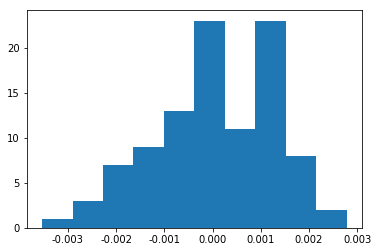

In [149]:
plt.hist(p_diffs);

j.  **p_diffs**列表的数值中，有多少比例的数值会大于 **ab_data.csv** 中观察到的实际**转化率差异** ？

In [150]:
# 理解后自己优化代码


# 临时测试代码
# XXXXXXXXXX_diffs 为实际观察到的转化差异，测试用变量名


XXXXXXXXXX_diffs = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
p_diffs = np.array(p_diffs)
(p_diffs > XXXXXXXXXX_diffs).mean()


0.89

k. 用文字解释一下你刚才在 **j.** 中计算出来的结果。在数据研究中，这个值是什么？ 根据这个数值，请判断新旧页面的转化率是否有显著差异。

>- 写下你的理解

#### `参考资料`
>- 假设检验中的P值 https://dwz.cn/r7IbxxHd
>- 零假设 https://blog.csdn.net/allenlu2008/article/details/47152263
>- P值 https://blog.csdn.net/allenlu2008/article/details/47171915
>- Z得分 https://blog.csdn.net/allenlu2008/article/details/47259609

> ### 首先带大家回顾上节课的概念和知识点，只有做到深刻理解了，才可能自己做出来

l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。使用内置程序可能很容易就能取得结果，但上面的内容仍然很重要，它可以训练你具有正确的数据统计思维。填写下面的内容来计算每个页面的转化次数，以及收到每个页面的用户数。计算新旧页面出现的次数，也就是数据中 `n_old` 与 `n_new` 分别出现的行数。

In [151]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()

m. 现在使用 `stats.proportions_ztest` 来计算你的检验统计量与 p-值。[这里](http://knowledgetack.com/python/statsmodels/proportions_ztest/) 是使用内置程序的一个有用链接。

In [152]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new],alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. 根据上题算出的 z-score 和 p-value，你认为新旧页面的转化率是否有区别？它们与 **j.** 与 **k.** 问题中的结果一致吗？

>- 写下你的理解（结合 K 问题下方给到的参考资料）

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='05'></a>
## 05：回归分析法之一


`1.` 在最后一部分中，你会看到，你在之前的A / B测试中获得的结果也可以通过执行回归来获取。

a. 既然每行的值是转化或不转化，那么在这种情况下，我们应该执行哪种类型的回归？

>- 在这里给出你的答案。

b. 目标是使用 **statsmodels** 来拟合你在 **a.** 中指定的回归模型，以查看用户收到的不同页面是否存在显著的转化差异。但是，首先，你需要为这个截距创建一个列（ 原文：column） ，并为每个用户收到的页面创建一个虚拟变量列。添加一个 **截距** 列，一个 **ab_page** 列，当用户接收 **treatment** 时为1， **control** 时为0。

In [153]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. 使用 **statsmodels** 导入你的回归模型。 实例化该模型，并使用你在 **b.** 中创建的2个列来拟合该模型，用来预测一个用户是否会发生转化。

In [154]:
mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. 请在下方提供你的模型摘要，并根据需要使用它来回答下面的问题。

In [155]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:55:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. 与 **ab_page** 关联的 p-值是多少？ 为什么它与你在 **II** 中发现的结果不同？<br><br>  **提示**: 与你的回归模型相关的零假设与备择假设分别是什么？它们如何与 **Part II** 中的零假设和备择假设做比较？

> - 在这里给出你的答案

f. 现在，你一定在考虑其他可能影响用户是否发生转化的因素。讨论为什么考虑将其他因素添加到回归模型中是一个不错的主意。在回归模型中添加附加项有什么弊端吗？

> - 在这里给出你的答案

>- ### `复习课程 15 第 15 节 “潜在问题” 第45秒开始`  [  点击查看课件位置  ](https://classroom.udacity.com/nanodegrees/nd002-cn-basic-vip/parts/4e7e2f82-e05e-4fbe-b29c-fe3169c6dd77/modules/0596b9e8-4a3a-41c3-a929-6c72c0c93925/lessons/49462f74-b030-4bb6-bf67-8281c9181404/concepts/e69f2749-dae6-47ca-a11b-bb88c03fc2c9)

g. 现在，除了测试不同页面的转化率是否会发生变化之外，还要根据用户居住的国家或地区添加一个 effect 项。你需要导入 **countries.csv** 数据集，并将数据集合并在适当的行上。 [这里](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) 是链接表格的文档。 

这个国家项对转化有影响吗？不要忘记为这些国家的列创建虚拟变量—— **提示: 你将需要为这三个虚拟变量增加两列。** 提供统计输出，并书面回答这个问题。

In [156]:
# 读取 countries 数据
# pd.read_csv('countries.csv')

In [157]:
# 方法一
# 上面读取的数据.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# 方法二
# 不改变df2的索引，通过on指定
# df2.join(上面读取的数据.set_index('user_id'),on='user_id')

In [158]:
# 增加不同的国家列
# 更新后的数据[['国家1','国家2']] = pd.get_dummies(更新后的数据['country'])[['国家1','国家2']]

In [159]:
# 参考上方 c、d 查看新模型的结果

>- 基于你得出的模型结果，给出分析结论

h. 虽然你现在已经查看了国家与页面在转化率上的个体性因素，但现在我们要查看页面与国家/地区之间的相互作用，测试其是否会对转化产生重大影响。创建必要的附加列，并拟合一个新的模型。  

提供你的摘要结果，以及根据结果得出的结论。

**提示：页面与国家/地区的相互作用**
```
df3['new_CA'] = df3['new_page'] * df3['CA']
df3['new_UK'] = df3['new_page'] * df3['UK']
```

In [160]:
# 注意理解上方给到的提示的运算

In [161]:
# 然后实例化新的模型，给出结论

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

> 拓展
- 图说置信区间和假设检验

>- https://www.zhang-ran.com/2019/03/12/332/